# Mine and Rock prediction

# Full Code

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Reading the data
df = pd.read_csv("D:\PROJECTS\Copy of sonar data.csv", header = None)

# Seperating the data one with values and other with label
data = df.drop(columns = 60, axis = 1)
label = df[60]

# Now we need to train and test the data
data_train, data_test, label_train, label_test = train_test_split(data, label, test_size = 0.1, stratify = label, random_state = 42)

# Now we will train the data with data and label train
model = LogisticRegression()
model.fit(data_train, label_train)

# prediction and accuracy_score of trained data
data_train_predict = model.predict(data_train)
data_train_accuracy_score = accuracy_score(data_train_predict, label_train)
print(data_train_accuracy_score)

# prediction and accuracy_score of tested data
data_test_predict = model.predict(data_test)
data_test_accuracy_score = accuracy_score(data_test_predict, label_test)
print(data_test_accuracy_score)

input_data = (0.0129,0.0141,0.0309,0.0375,0.0767,0.0787,0.0662,0.1108,0.1777,0.2245,0.2431,0.3134,0.3206,0.2917,0.2249,0.2347,0.2143,0.2939,0.4898,0.6127,0.7531,0.7718,0.7432,0.8673,0.9308,0.9836,1.0000,0.9595,0.8722,0.6862,0.4901,0.3280,0.3115,0.1969,0.1019,0.0317,0.0756,0.0907,0.1066,0.1380,0.0665,0.1475,0.2470,0.2788,0.2709,0.2283,0.1818,0.1185,0.0546,0.0219,0.0204,0.0124,0.0093,0.0072,0.0019,0.0027,0.0054,0.0017,0.0024,0.0029)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshape = input_data_as_numpy_array.reshape(1,-1)
prediction = model.predict(input_data_reshape)

if prediction == "M":
    print("Object Detected is 'MINE'")
elif prediction == "R":
    print("Object Detected is 'ROCK'")

0.8235294117647058
0.8571428571428571
Object Detected is 'MINE'


# Step-Wise Execution

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [4]:
sonar_data = pd.read_csv('D:\PROJECTS\Copy of sonar data.csv', header = None)
sonar_data.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [5]:
sonar_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


If we have almost equal values for both Labels then only this prediction works well

<AxesSubplot: >

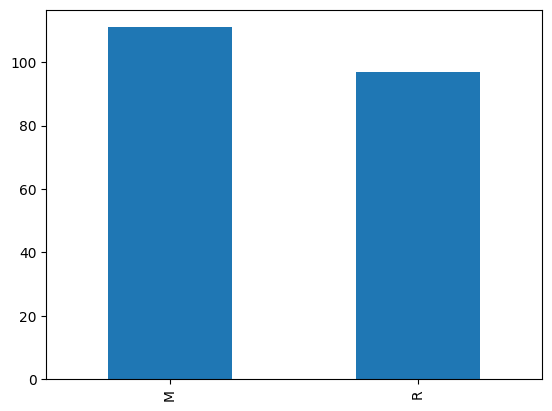

In [6]:
sonar_data[60].value_counts().plot(kind = 'bar')

In [11]:
A = sonar_data.drop(columns = 60, axis = 1)
B = sonar_data[60]

In [12]:
print(A)
print(B)

         0       1       2       3       4       5       6       7       8   \
0    0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1    0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2    0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3    0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4    0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
203  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   
204  0.0323  0.0101  0.0298  0.0564  0.0760  0.0958  0.0990  0.1018  0.1030   
205  0.0522  0.0437  0.0180  0.0292  0.0351  0.1171  0.1257  0.1178  0.1258   
206  0.0303  0.0353  0.0490  0.0608  0.0167  0.1354  0.1465  0.1123  0.1945   
207  0.0260  0.0363  0.0136  0.0272  0.0214  0.0338  0.0655  0.1400  0.1843   

         9   ...      50      51      52      53   

Now we Split the data into "Train" and "Test" and for test we gave 10% data

In [111]:
A_train, A_test, B_train, B_test = train_test_split(A, B, test_size = 0.1, stratify = B, random_state = 42)

Now by using "LogisticRegression" we can train the model

In [112]:
model = LogisticRegression()

In [113]:
model.fit(A_train, B_train)

LogisticRegression()

Now we predict the data and check the accuracy that how much is it giving the accuracy

In [114]:
A_train_predict = model.predict(A_train)

Accuracy_score for "Trained Data"

In [115]:
A_train_accuracy_score = accuracy_score(A_train_predict, B_train)
print(A_train_accuracy_score)

0.8235294117647058


Accuracy_score for "Test Data"

In [116]:
A_test_predict = model.predict(A_test)

In [117]:
A_test_accuracy_score = accuracy_score(A_test_predict, B_test)
print(A_test_accuracy_score)

0.8571428571428571


In [121]:
input_user = (0.0238,0.0318,0.0422,0.0399,0.0788,0.0766,0.0881,0.1143,0.1594,0.2048,0.2652,0.3100,0.2381,0.1918,0.1430,0.1735,0.1781,0.2852,0.5036,0.6166,0.7616,0.8125,0.7793,0.8788,0.8813,0.9470,1.0000,0.9739,0.8446,0.6151,0.4302,0.3165,0.2869,0.2017,0.1206,0.0271,0.0580,0.1262,0.1072,0.1082,0.0360,0.1197,0.2061,0.2054,0.1878,0.2047,0.1716,0.1069,0.0477,0.0170,0.0186,0.0096,0.0071,0.0084,0.0038,0.0026,0.0028,0.0013,0.0035,0.0060)
input_user_as_numpy_array = np.asarray(input_user)
input_user_reshape = input_user_as_numpy_array.reshape(1,-1)
prediction = model.predict(input_user_reshape)
print(prediction)

if prediction == "R":
    print("Object Scanned is 'Rock'")
else:
    print("Danger!!! Object Scanned is 'Mine'")

['M']
Danger!!! Object Scanned is 'Mine'
